<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/hw8_3b_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3b. Solving the differential equations numerically

In [1]:
import numpy as np
from scipy.integrate import odeint
import copy
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
kAD = 1.0
kmAD = 0.7
kB = 1.0
kmB = 0.4 
kS = 0.6
kD = 1.0
kmD = 0.5

In [3]:
def coupled_odes(C, t):
    
    # 0 - A ; 1 - S; 2 - A.S; 3 - B; 4 - B.S; 5 - C.S; 6 - C
    ddt = np.zeros(7, dtype=float) # initialize an empty array
    ddt[0] =  -(kAD * C[0] * C[1] - kmAD * C[2])
    ddt[1] =  -kAD * C[0] * C[1] + kmAD * C[2] - kB * C[3] * C[1] + kmB * C[4] + kS* C[4] * C[2] + kD * C[5] - kmD * C[6] * C[1]
    ddt[2] = kAD * C[0] * C[1] - kmAD * C[2] - kS * C[2] * C[4] 
    ddt[3] = -kB * C[1] * C[3] + kmB * C[4]
    ddt[4] = kB * C[1] * C[3] - kmB * C[4] - kS * C[4] * C[2]
    ddt[5] = kS * C[4] * C[2] - kD * C[5] + kmD * C[6] * C[1]
    ddt[6] = kD * C[5] - kmD * C[6] * C[1]

    return ddt

Define an array of W values at which we want to solve the coupled ODEs

In [4]:
t = np.arange(0.,40.,0.2)

CA0 = 2.0  # mol/g
CS0 = 1.5  # mol/g
CAS0 = 0.0 # mol/g
CB0 = 2.0 # mol/g
CBS0 = 0.0  # mol/g
CCS0 = 0.0 # mol/g
CC0 = 0.0  # mol/g

init_values = np.array([CA0, CS0, CAS0, CB0, CBS0, CCS0, CC0],dtype=float)  # combine initial values into an array

sol = odeint(coupled_odes, init_values, t)    # solve the system of coupled ODEs over the entire array of W values

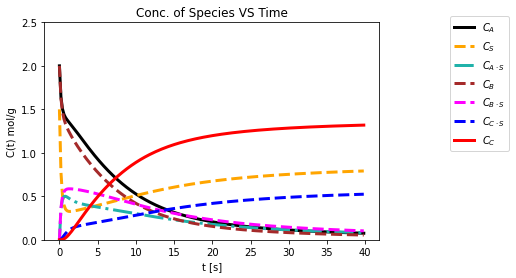

In [5]:
plt.figure()
plt.plot(t, sol[:,0], '-', color = "black", linewidth = 3, label= "$C_{A}$")
plt.plot(t, sol[:,1],'--',  color="orange", linewidth = 3, label="$C_{S}$")
plt.plot(t, sol[:,2],'-.', color="lightseagreen", linewidth = 3, label="$C_{A\cdot S}$")
plt.plot(t, sol[:,3],'--', color="brown", linewidth = 3, label="$C_{B}$")
plt.plot(t, sol[:,4],'--', color="magenta", linewidth = 3, label="$C_{B\cdot S}$")
plt.plot(t, sol[:,5],'--', color="blue", linewidth = 3, label="$C_{C\cdot S}$")
plt.plot(t, sol[:,6],'-', color="red", linewidth = 3, label="$C_{C}$")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05))
plt.title("Conc. of Species VS Time")
plt.xlabel("t [s]")
plt.ylabel("C(t) mol/g")
plt.ylim([0,2.5])
plt.show()

##Discussion

The plot shows that the concentration of species A & B decreases with time, but does not go to zero since the last step is reversible. The number of molecule of A & B being absorb to the surface as a function of time started from 0, increases rapidly, then goes down because most of it reacted to form the product. The concentration of the vacant site started from 1.5 mol/g, occupied instantly by reactants, then started to go back up as it's being freed, but not back to the initial concentration since it is not completely free. The amount of the product, c, being aborbed to the surface increases as a function of time because the last step is reversible. The concentration of the product, C, increases rapidly initially. Continued to increase slowly and plateaus roughly around 35s. But the maximum value based on the size of the reactor is not reached since some of it is being reversed.

##2A 
Plot a(z) & X(z)?

In [6]:
def coupled_odes_2(X, Z):

  density_cat = 50  # kg-cat/m^3
  k_prime = 0.002 # kmol/kg-cat*s*atm^2
  PA0 = 12 # atm
  CA0 = 0.22 # kmol/m^3
  U0 = 2.5 # m/s
  
  ddZ = np.zeros(1, dtype=float) # initialize an empty array
  ddZ = ((density_cat)*(1/(1+12*(((Z/(2.5+(5*X))))**.5)))*k_prime*(((PA0*(1-X)/(1+(2*X)))**2)))/(U0*CA0)
  
  
  return ddZ

In [7]:
Z = np.arange(0.,2.0,.2)

XA0 = 0.0  #Initial conversion

sol_2 = odeint(coupled_odes_2, XA0, Z)    # solve the ODE
a = (1/(1+12*(((Z/(2.5+(5*sol_2[:,0])))**.5))))  # solve for a

In [8]:
print(sol_2[:,0])
print(a)


[0.         0.45304933 0.53804251 0.58560854 0.61799216 0.64221075
 0.66136709 0.67709786 0.69036793 0.70179172]
[1.         0.28915058 0.23087555 0.20041469 0.18051699 0.16607488
 0.15491645 0.14592854 0.13846975 0.13213933]


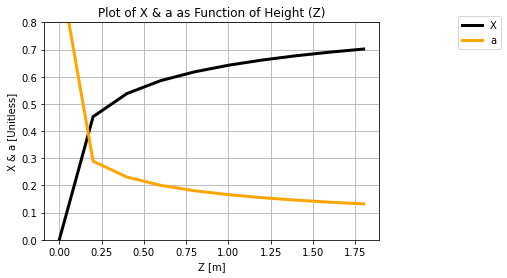

In [9]:
plt.plot(Z, sol_2[:,0], '-', color = "black", linewidth = 3, label= "X")
plt.plot(Z, a, '-',  color="orange", linewidth = 3, label="a")
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05))
plt.title("Plot of X & a as Function of Height (Z)")
plt.xlabel("Z [m]")
plt.ylabel("X & a [Unitless]")
plt.ylim([0,.8])
plt.grid()
plt.show()